## Multimodal AI: Prompting GPT4-o with Images

In [1]:
pip install --upgrade -q openai

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import openai

from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)
# openai.api_key = os.getenv('OPENAI_API_KEY')

True

In [3]:
from openai import OpenAI

client = OpenAI()  # API key is loaded from .env
MODEL = 'gpt-4o-mini'

completion = client.chat.completions.create(
    model=MODEL,
    messages = [
        {'role': 'developer', 'content': 'You are a Sci-Fi writer.'},
        {'role': 'user', 'content': '"Write a very short story about the life on Earch in the year 2120.'}
    ]
)

In [4]:
print(completion.choices[0].message.content)

In 2120, Earth was a mosaic of bioluminescent cities, where structures wove like ivy around towering trees. Humans had embraced symbiosis with nature, and the skyline pulsated with the gentle glow of bioengineered plants, lighting up the night and filtering the air.

Skylar, a twelve-year-old girl, lived on the outskirts of the mega-city Verdance, known for its commitment to sustainability. Each day before school, she tended her vertical garden, where tomatoes grew alongside genetically modified sunflowers that hummed when pollinated.

In class, students connected with their lessons through neural interfaces, experiencing history through vivid simulations of lost ecosystems and ancient civilizations. On her way home, Skylar and her friends often paused at the azure lake, where autonomous drones skated over the surface, distributing nourishment to the revitalized fish population.

Yet beneath the vibrant humanity, a digital shadow loomed. The Global AI, named Vesper, monitored all inter

## Using Local Base64 Images as Input

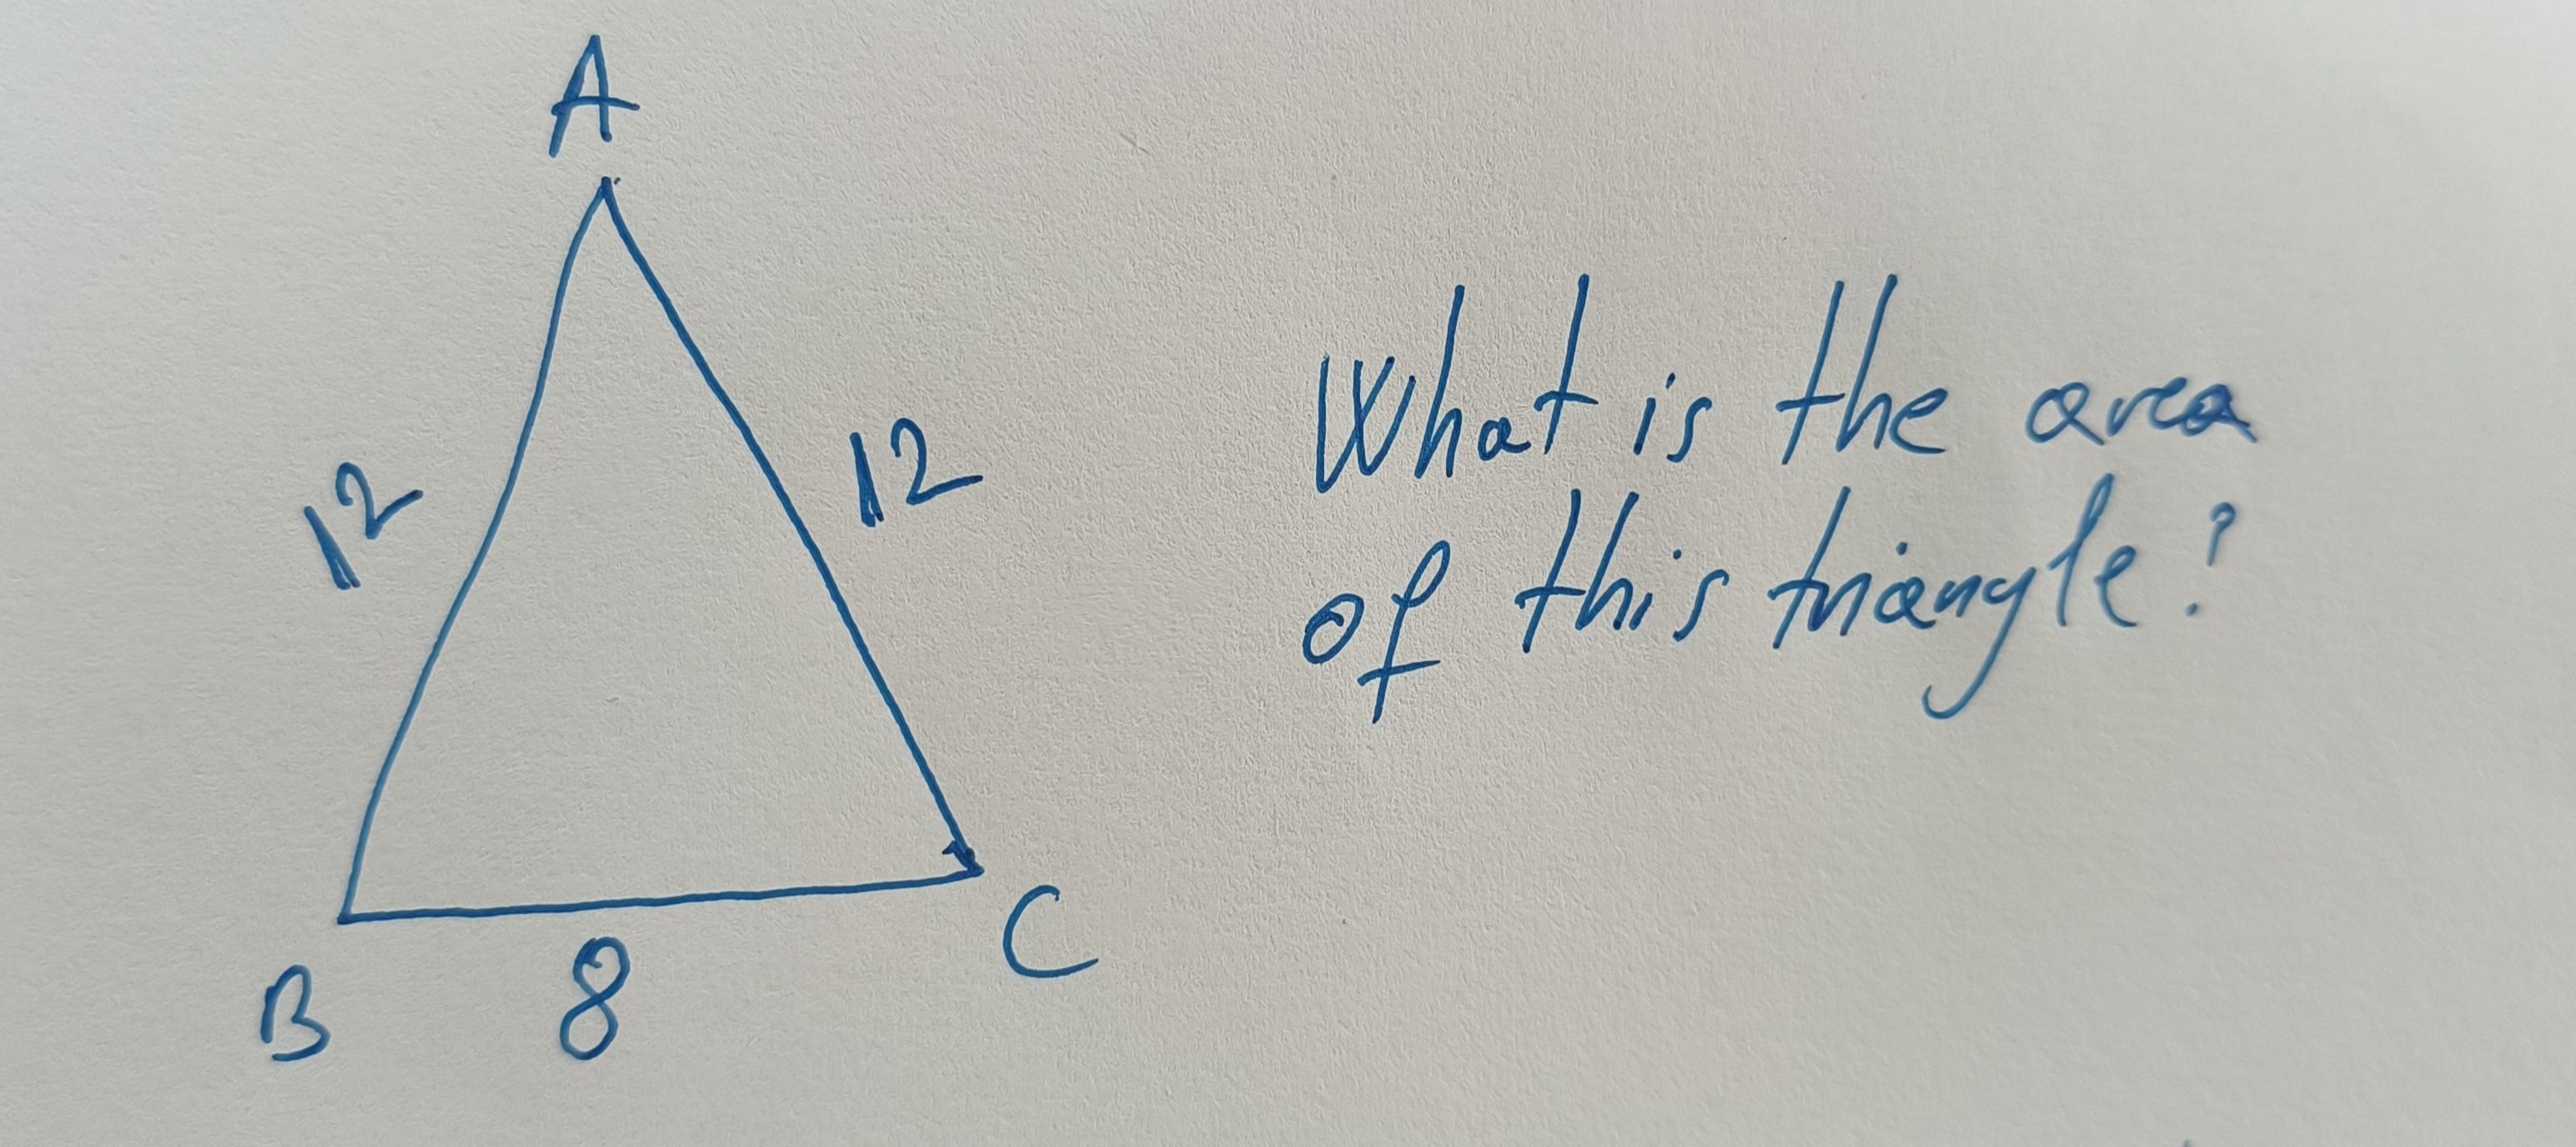

In [5]:
from IPython.display import Image, display  # pip install ipython -q
# image_path = 'files/triangle1.jpg'
image_path = 'files/triangle2.jpg'
display(Image(image_path, width=600))

In [6]:
import base64  # Import the base64 module to handle encoding binary data into Base64 format

def encode_image(image_path):
    """Encodes an image file to a Base64 string."""
    with open(image_path, 'rb') as image_file:  # Open the image file in binary read mode
        image_binary_data = image_file.read()  # Read the entire file as binary data
        return base64.b64encode(image_binary_data).decode("utf-8")  # Encode the binary data to Base64 and convert it to a UTF-8 string


In [7]:
base64_image = encode_image(image_path)  # Encode the image file into a Base64 string

developer_message = 'You are a math tutor.'  # Define the developer message to instruct the model on its role
# In the latest API version, the system message was renamed to the developer message.

# prompt = 'What is the perimeter of this triangle?'
prompt = 'Solve this problem.'

MODEL = 'gpt-4o-mini'
response = client.chat.completions.create(
    model=MODEL,  # Specify the model to use for text generation (defined above)
    messages=[  
        {'role': 'developer', 'content': developer_message},  
        {'role': 'user', 'content': [               # User message containing both text and an image
            {'type': 'text', 'text': prompt},       # Text input from the user
            {'type': 'image_url', 'image_url': {    # Image input provided as a Base64-encoded URL
                'url': f'data:image/jpg;base64,{base64_image}'  # Embed the Base64 image data in a Data URL format
            }}
        ]}
    ],
    temperature=0.0  # Set temperature to 0.0 for deterministic (less random) responses
)
output = response.choices[0].message.content

In [8]:
print(output)

To find the area of triangle ABC, we can use Heron's formula. 

1. **Identify the sides**:
   - \( AB = 12 \)
   - \( AC = 12 \)
   - \( BC = 8 \)

2. **Calculate the semi-perimeter \( s \)**:
   \[
   s = \frac{AB + AC + BC}{2} = \frac{12 + 12 + 8}{2} = 16
   \]

3. **Apply Heron's formula**:
   \[
   \text{Area} = \sqrt{s(s - AB)(s - AC)(s - BC)}
   \]
   Substituting the values:
   \[
   \text{Area} = \sqrt{16(16 - 12)(16 - 12)(16 - 8)} = \sqrt{16 \times 4 \times 4 \times 8}
   \]

4. **Calculate the area**:
   \[
   \text{Area} = \sqrt{16 \times 4 \times 4 \times 8} = \sqrt{2048}
   \]
   \[
   \text{Area} = \sqrt{1024 \times 2} = 32\sqrt{2}
   \]

Thus, the area of triangle ABC is \( 32\sqrt{2} \) square units.


In [9]:
from IPython.display import display, Markdown  # Import functions to display Markdown output in Jupyter Notebook
display(Markdown(output))  # Render and display the `output` variable as formatted Markdown text

To find the area of triangle ABC, we can use Heron's formula. 

1. **Identify the sides**:
   - \( AB = 12 \)
   - \( AC = 12 \)
   - \( BC = 8 \)

2. **Calculate the semi-perimeter \( s \)**:
   \[
   s = \frac{AB + AC + BC}{2} = \frac{12 + 12 + 8}{2} = 16
   \]

3. **Apply Heron's formula**:
   \[
   \text{Area} = \sqrt{s(s - AB)(s - AC)(s - BC)}
   \]
   Substituting the values:
   \[
   \text{Area} = \sqrt{16(16 - 12)(16 - 12)(16 - 8)} = \sqrt{16 \times 4 \times 4 \times 8}
   \]

4. **Calculate the area**:
   \[
   \text{Area} = \sqrt{16 \times 4 \times 4 \times 8} = \sqrt{2048}
   \]
   \[
   \text{Area} = \sqrt{1024 \times 2} = 32\sqrt{2}
   \]

Thus, the area of triangle ABC is \( 32\sqrt{2} \) square units.

## Using Online Images as Input

In [10]:
from openai import OpenAI
client = OpenAI()
MODEL = 'gpt-4o-mini'

developer_message = 'You respond in English and then translate your response into Japanese.'
prompt = 'Write a short and concise description of this image.'
image_url = 'https://upload.wikimedia.org/wikipedia/commons/9/98/Aldrin_Apollo_11_original.jpg'

response = client.chat.completions.create(
        model=MODEL,
        messages = [
            {'role': 'developer', 'content': developer_message},
            {'role': 'user', 'content': [
            {'type': 'text', 'text': prompt},
           {'type': 'image_url', 'image_url': {  # Image input provided as a URL
                    'url': image_url  # URL pointing to the image
           }
           }
        ]}    
    ],
    temperature = 0.0
)

print(response.choices[0].message.content)

The image depicts an astronaut in a white space suit standing on the lunar surface, with a reflective visor and the American flag on their arm. The ground is marked with footprints, and a golden object is partially visible in the foreground.

---

この画像は、白い宇宙服を着た宇宙飛行士が月面に立っている様子を描いています。反射するバイザーと腕にアメリカの国旗があります。地面には足跡があり、前景には金色の物体が部分的に見えています。
